# Exercice 1 : Calcul du BER d'une QAM-4

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [2]:
def rand(N):
    """
    Crée un vecteur de N valeurs aléatoires valant soit -1, soit 1.
    """
    x = np.random.randint(2, size=N)  # Soit 0, soit 1
    x *= 2  # Soit 0, soit 2
    return x - 1  # Soit -1, soit 1


def randn(N, s=1):
    """
    Crée un vecteur de N valeurs aléatoires centrées en 0 et de variance s.
    """
    return np.random.randn(N) * np.sqrt(s)


def complex2real(z):
    """
    Convertit un vecteur de nombres complexes en un vecteur de 2 nombres réels (partie réelle et imag.).
    """
    real = np.real(z)
    imag = np.imag(z)
    return np.column_stack([real, imag])


def real2complex(x):
    """
    Fonction inverse de la fonction complex2real.
    """
    real, imag = x.T
    return real + 1j * imag


def closest_symbols(y):
    """
    Retournes x_hat en fonction de y, à savoir le symbole le plus proche dans la constellation.
    """
    symbols = np.array([1 + 1j, 1 - 1j, -1 + 1j, -1 - 1j])

    # Comme la fonction distance_matrix fonctionne avec des nombres réels,
    # on transforme le vecteur de nombres complexes en vecteur de 2 nombres réels

    symbols = complex2real(symbols)
    y = complex2real(y)

    distances = distance_matrix(y, symbols)
    # On récupère, pour chaque point, l'indice du symbole le plus proche
    closest_indices = np.argmin(distances, axis=1)

    return real2complex(symbols[closest_indices])


def ber(x, x_hat):
    """
    Calcule le BER entre x et x_hat (son estimation).
    """
    errors = x != x_hat

    return np.sum(errors) / len(x)


def plot_constellation(x, symbol="x"):
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(x), np.imag(x))
    plt.xlabel(r"$\Re({x})$".format(x=symbol))
    plt.ylabel(r"$\Im({x})$".format(x=symbol))
    plt.axis("equal")


def plot_snr_vs_ber(SNR, BER):
    plt.figure(figsize=(6, 6))
    plt.semilogy(10 * np.log10(SNR), BER)
    plt.xlabel("SNR (dB)")
    plt.ylabel("BER")

In [3]:
N = int(1e6)  # Par défaut, la notation 1eX = 10^X crée un nombre à virgule


x = rand(N) + 1j * rand(N)

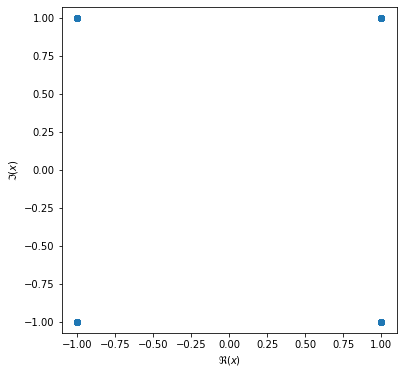

In [4]:
# Les points sont situés sur l'un des 4 coins
plot_constellation(x)

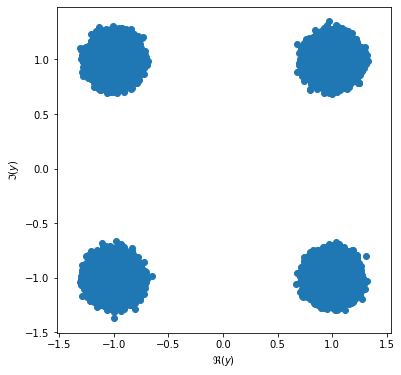

In [5]:
s = 1e-2

n = randn(N, s / 2) + 1j * randn(N, s / 2)

y = x + n

plot_constellation(y, symbol="y")

In [6]:
x_hat = closest_symbols(y)
x_hat

array([ 1.+1.j,  1.-1.j,  1.-1.j, ..., -1.+1.j, -1.-1.j,  1.+1.j])

In [7]:
ber(x, x_hat)

0.0

In [8]:
BER = []
SNR = []

for s in np.logspace(-2, 1, 25):

    n = randn(N, s / 2) + 1j * randn(N, s / 2)

    y = x + n

    x_hat = closest_symbols(y)

    snr = 2 / s
    SNR.append(snr)
    BER.append(ber(x, x_hat))

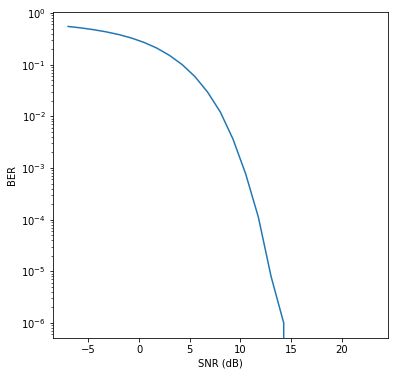

In [9]:
plot_snr_vs_ber(SNR, BER)

# On a bien un résultat similaire à https://www.raymaps.com/index.php/qam-theoretical-ber/

# Exercice 2 : DCT